# Import the necessary libraries: 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Get the Dataset 

In [4]:
mpg = pd.read_csv('auto-mpg.csv')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
mpg.shape

(398, 9)

In [7]:
print("The number of rows", mpg.shape[0])
print("The number of columns", mpg.shape[1])

The number of rows 398
The number of columns 9


In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
mpg['origin'] = mpg['origin'].astype('object')


In [10]:
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [12]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors = 'coerce')

mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)

mpg['horsepower'].fillna(0, inplace=True)

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
# Drop rows with NaN values in the 'horsepower' column 
mpg.dropna(subset=['horsepower'], inplace=True)

In [14]:
# Checking the missing values in dataset

print("Missing value?", mpg.isnull().values.any())

Missing value? False


In [15]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [16]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [17]:
# Check for the Duplicate Data
mpg.duplicated().any()

False

# Data Visualization

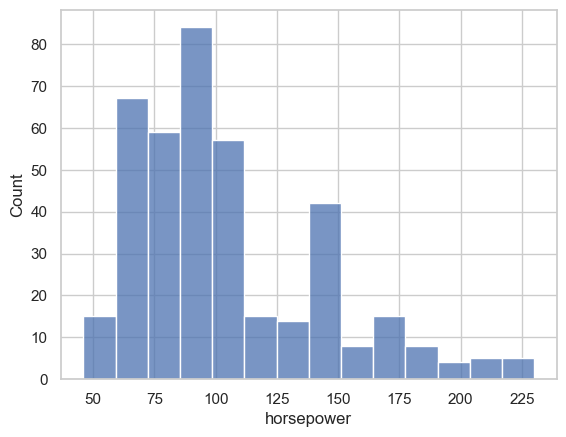

In [19]:
# Create a histogram 
sns.histplot(mpg, x='horsepower') 
plt.xlabel('horsepower') 
plt.show()

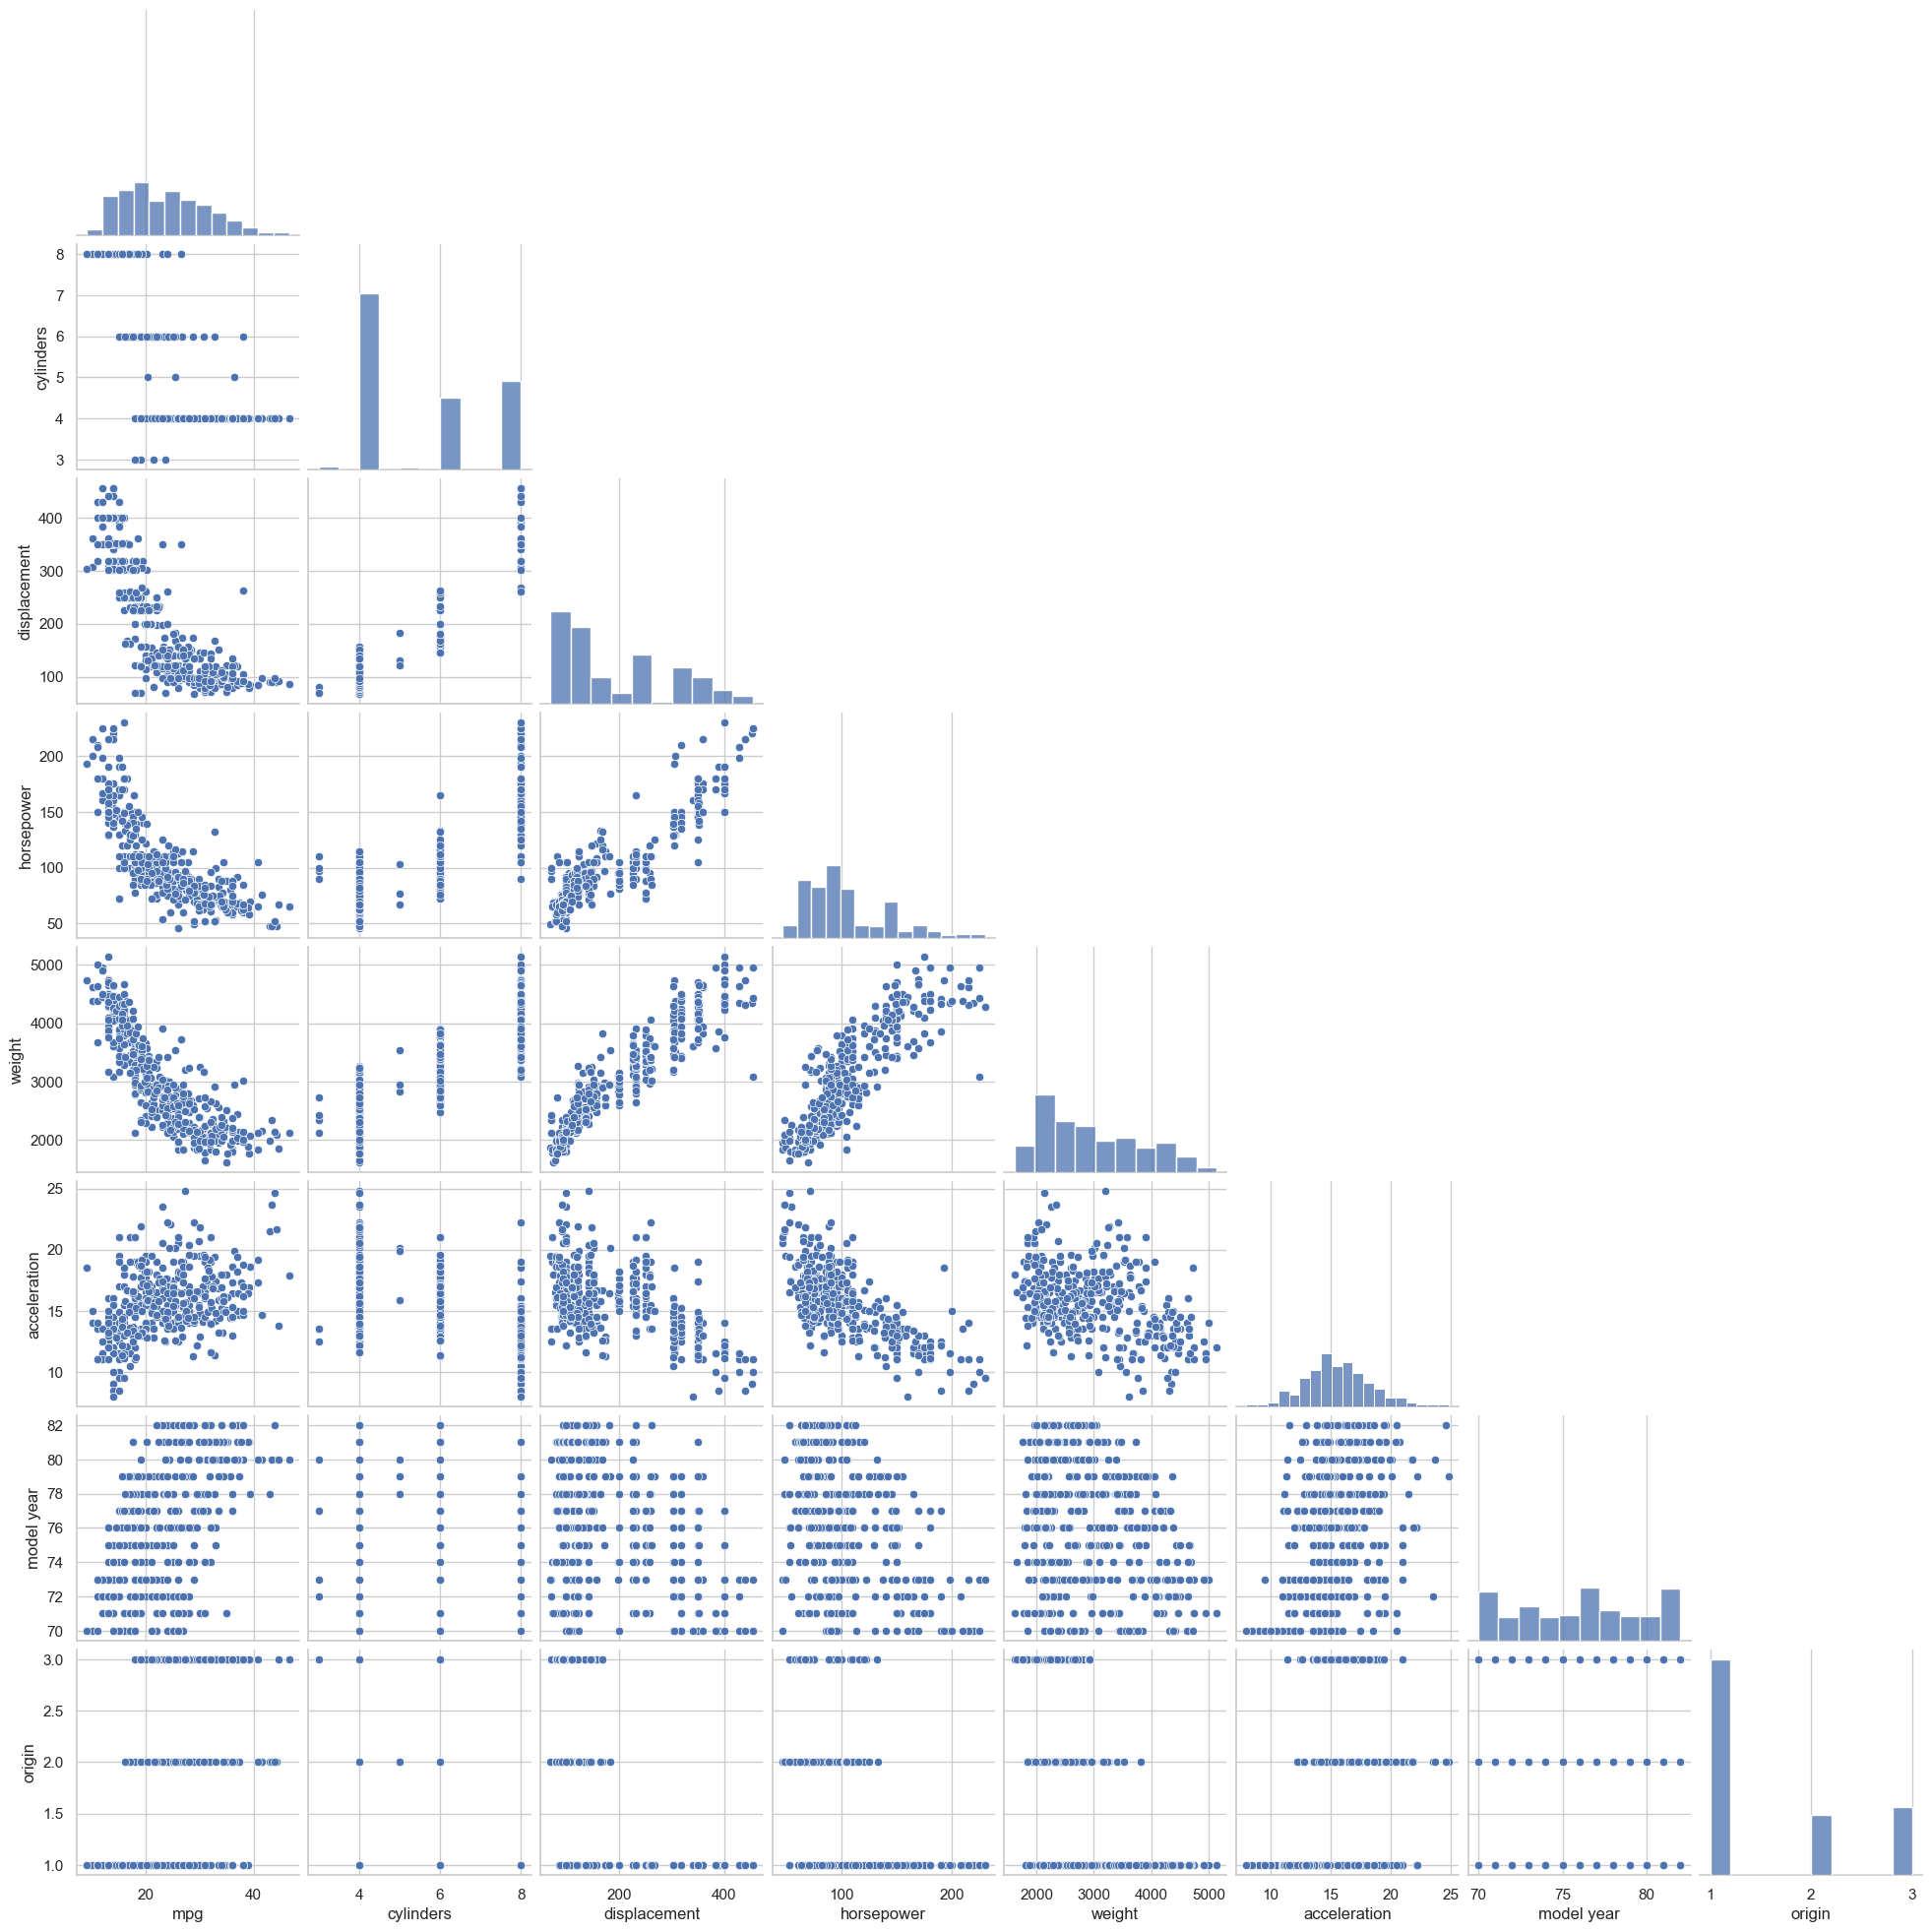

In [20]:
# Create a pairplot
sns.pairplot(mpg, corner=True)
plt.show()

In [21]:
# Select only the numeric columns
numeric_cols = mpg.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric data
corr_matrix = numeric_cols.corr()

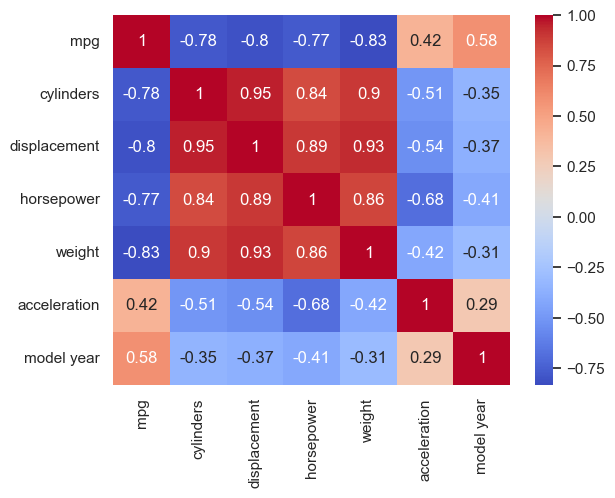

In [22]:
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [24]:
top_5_car_names = mpg['car name'].value_counts().head(5)

top_5_car_names

car name
ford pinto            6
toyota corolla        5
amc matador           5
ford maverick         5
chevrolet chevette    4
Name: count, dtype: int64

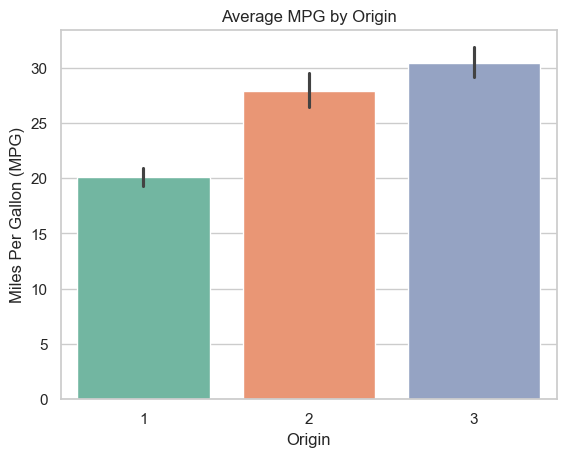

In [25]:
# Create a bar plot mpg vs origin
sns.barplot(data=mpg, x='origin', y='mpg', palette='Set2')
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

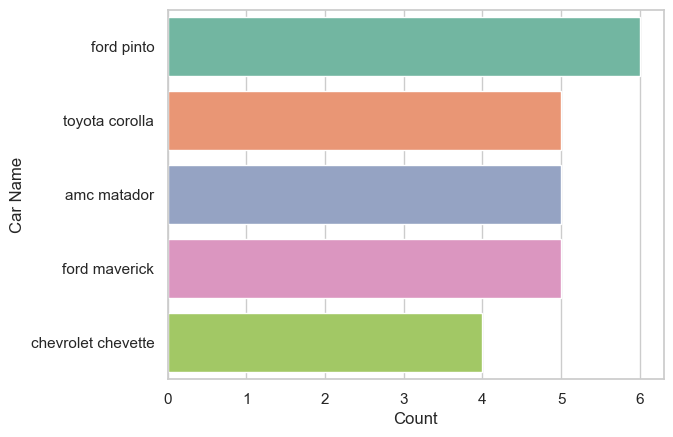

In [26]:
# Create a bar graph to show the top 5 car 
sns.barplot(x=top_5_car_names.values, y=top_5_car_names.index, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()

In [27]:
# Top 5 car according to hosepower 
top_5_car_horsepower = mpg.groupby('car name')['horsepower'].mean().head(5)
top_5_car_horsepower

car name
amc ambassador brougham    175.0
amc ambassador dpl         190.0
amc ambassador sst         150.0
amc concord                 90.0
amc concord d/l            120.0
Name: horsepower, dtype: float64

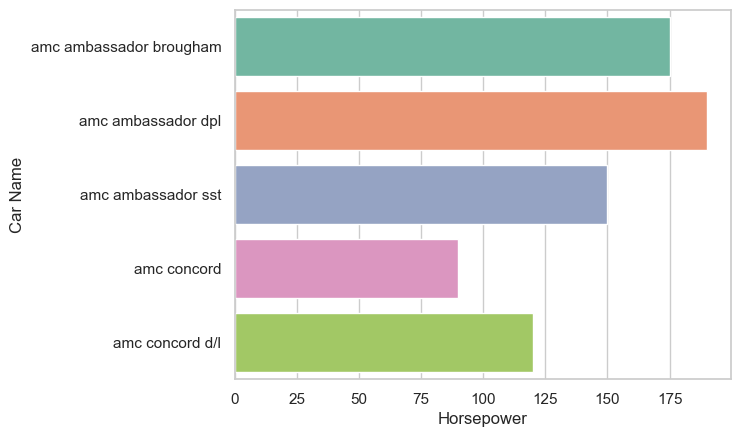

In [28]:
# Create a bar graph to show the top 5 car 
sns.barplot(x=top_5_car_horsepower.values, y=top_5_car_horsepower.index, palette='Set2')
plt.xlabel('Horsepower')
plt.ylabel('Car Name')
plt.show()

# Training and Testing Data

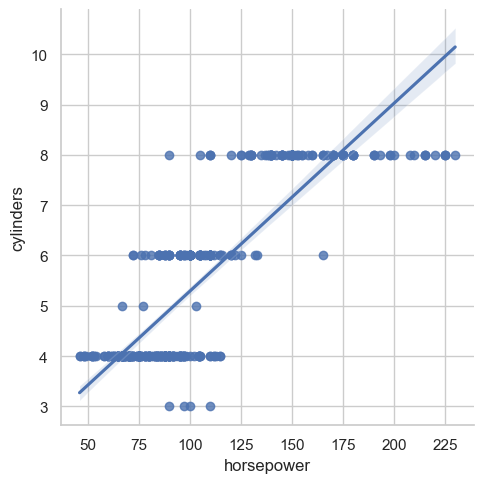

In [30]:
# Create a linear model plot (using seaborn's lmplot) of horsepower vs. cylinders
sns.lmplot(x='horsepower', y='cylinders', data=mpg)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [33]:
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
# Print out the coefficients of the model
lm.coef_

array([-0.57354177,  0.02136146, -0.01115435, -0.00681017,  0.05199957,
        0.79226577,  1.24295696])

# Predicting Test Data

In [38]:
predictions = lm.predict(X_test)


#  Create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted Values')

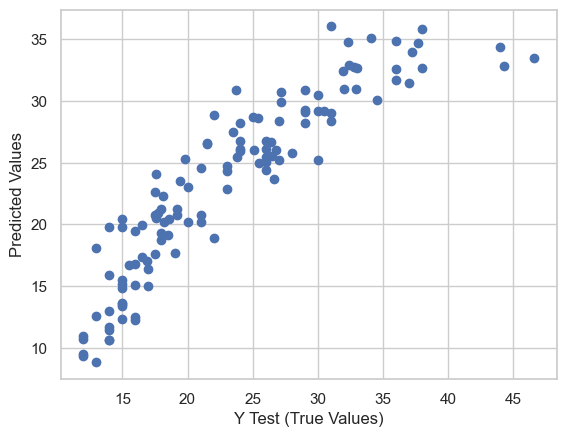

In [40]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 11.360384389502746
R-squared: 0.8187357322584314
